In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
import os
import glob

In [2]:
epochs = 500
minlam = 1
maxlam = 1000

In [3]:
files = glob.glob("img/cr-" + str(epochs) + "-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-*-0.0001-ista-preds.csv")

In [4]:
des = []
for file in files:
    if float(file.split('-')[5]) >= minlam and float(file.split('-')[5]) <= maxlam:
        des.append(file)

In [5]:
len(des)

20

In [6]:
df = pd.read_csv(des[0], index_col = 0)

In [7]:
truths = df['y_true'].tolist()

In [8]:
truths

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [9]:
portions = [0] * 10000

In [10]:
for file in des:
    df = pd.read_csv(file, index_col = 0)
    portions = [sum(x) for x in zip(portions, (df['y_probas'] > 1e-8).tolist())]

In [11]:
portions

[0,
 12,
 12,
 10,
 20,
 9,
 15,
 13,
 16,
 9,
 11,
 12,
 11,
 9,
 12,
 9,
 12,
 11,
 13,
 11,
 11,
 12,
 9,
 9,
 11,
 10,
 11,
 9,
 9,
 9,
 12,
 11,
 12,
 11,
 12,
 12,
 12,
 12,
 11,
 10,
 11,
 12,
 9,
 12,
 9,
 12,
 11,
 11,
 11,
 10,
 9,
 11,
 10,
 12,
 9,
 12,
 11,
 9,
 11,
 9,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 11,
 8,
 9,
 11,
 12,
 12,
 9,
 11,
 9,
 13,
 12,
 12,
 9,
 12,
 12,
 10,
 13,
 12,
 12,
 12,
 11,
 12,
 11,
 12,
 10,
 11,
 13,
 11,
 11,
 11,
 12,
 11,
 12,
 12,
 0,
 10,
 7,
 18,
 9,
 12,
 10,
 15,
 9,
 8,
 12,
 8,
 7,
 9,
 7,
 9,
 9,
 12,
 12,
 9,
 10,
 7,
 6,
 10,
 8,
 9,
 6,
 7,
 6,
 12,
 10,
 12,
 10,
 9,
 9,
 10,
 9,
 9,
 8,
 8,
 9,
 8,
 9,
 7,
 9,
 10,
 9,
 8,
 8,
 8,
 8,
 8,
 10,
 8,
 9,
 10,
 6,
 8,
 7,
 9,
 8,
 8,
 10,
 11,
 9,
 9,
 8,
 8,
 7,
 8,
 8,
 10,
 7,
 10,
 8,
 11,
 7,
 10,
 8,
 9,
 10,
 8,
 12,
 9,
 14,
 9,
 9,
 7,
 9,
 9,
 8,
 8,
 16,
 8,
 8,
 8,
 9,
 9,
 9,
 12,
 11,
 0,
 7,
 18,
 8,
 14,
 11,
 13,
 8,
 8,
 13,
 7,
 8,
 9,
 7,
 10,
 8,
 10,
 9,
 8,

In [12]:
len(portions)

10000

In [13]:
portions = [i/20 for i in portions]

In [14]:
portions

[0.0,
 0.6,
 0.6,
 0.5,
 1.0,
 0.45,
 0.75,
 0.65,
 0.8,
 0.45,
 0.55,
 0.6,
 0.55,
 0.45,
 0.6,
 0.45,
 0.6,
 0.55,
 0.65,
 0.55,
 0.55,
 0.6,
 0.45,
 0.45,
 0.55,
 0.5,
 0.55,
 0.45,
 0.45,
 0.45,
 0.6,
 0.55,
 0.6,
 0.55,
 0.6,
 0.6,
 0.6,
 0.6,
 0.55,
 0.5,
 0.55,
 0.6,
 0.45,
 0.6,
 0.45,
 0.6,
 0.55,
 0.55,
 0.55,
 0.5,
 0.45,
 0.55,
 0.5,
 0.6,
 0.45,
 0.6,
 0.55,
 0.45,
 0.55,
 0.45,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.6,
 0.6,
 0.55,
 0.4,
 0.45,
 0.55,
 0.6,
 0.6,
 0.45,
 0.55,
 0.45,
 0.65,
 0.6,
 0.6,
 0.45,
 0.6,
 0.6,
 0.5,
 0.65,
 0.6,
 0.6,
 0.6,
 0.55,
 0.6,
 0.55,
 0.6,
 0.5,
 0.55,
 0.65,
 0.55,
 0.55,
 0.55,
 0.6,
 0.55,
 0.6,
 0.6,
 0.0,
 0.5,
 0.35,
 0.9,
 0.45,
 0.6,
 0.5,
 0.75,
 0.45,
 0.4,
 0.6,
 0.4,
 0.35,
 0.45,
 0.35,
 0.45,
 0.45,
 0.6,
 0.6,
 0.45,
 0.5,
 0.35,
 0.3,
 0.5,
 0.4,
 0.45,
 0.3,
 0.35,
 0.3,
 0.6,
 0.5,
 0.6,
 0.5,
 0.45,
 0.45,
 0.5,
 0.45,
 0.45,
 0.4,
 0.4,
 0.45,
 0.4,
 0.45,
 0.35,
 0.45,
 0.5,
 0.45,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.

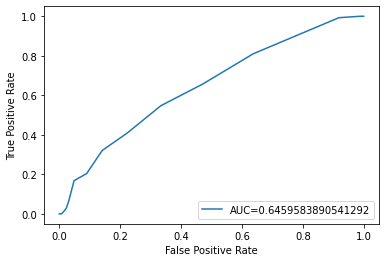

In [15]:
fpr, tpr, _ = metrics.roc_curve(truths,  portions)
auc = metrics.roc_auc_score(truths, portions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()